In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Imputer

# 数据初探

In [258]:
datapath1 = r"C:\Users\Administrator\Desktop\handson-ml-master\datasets\housing\housing.csv"
housing = pd.read_csv(datapath1)

In [259]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [260]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [261]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


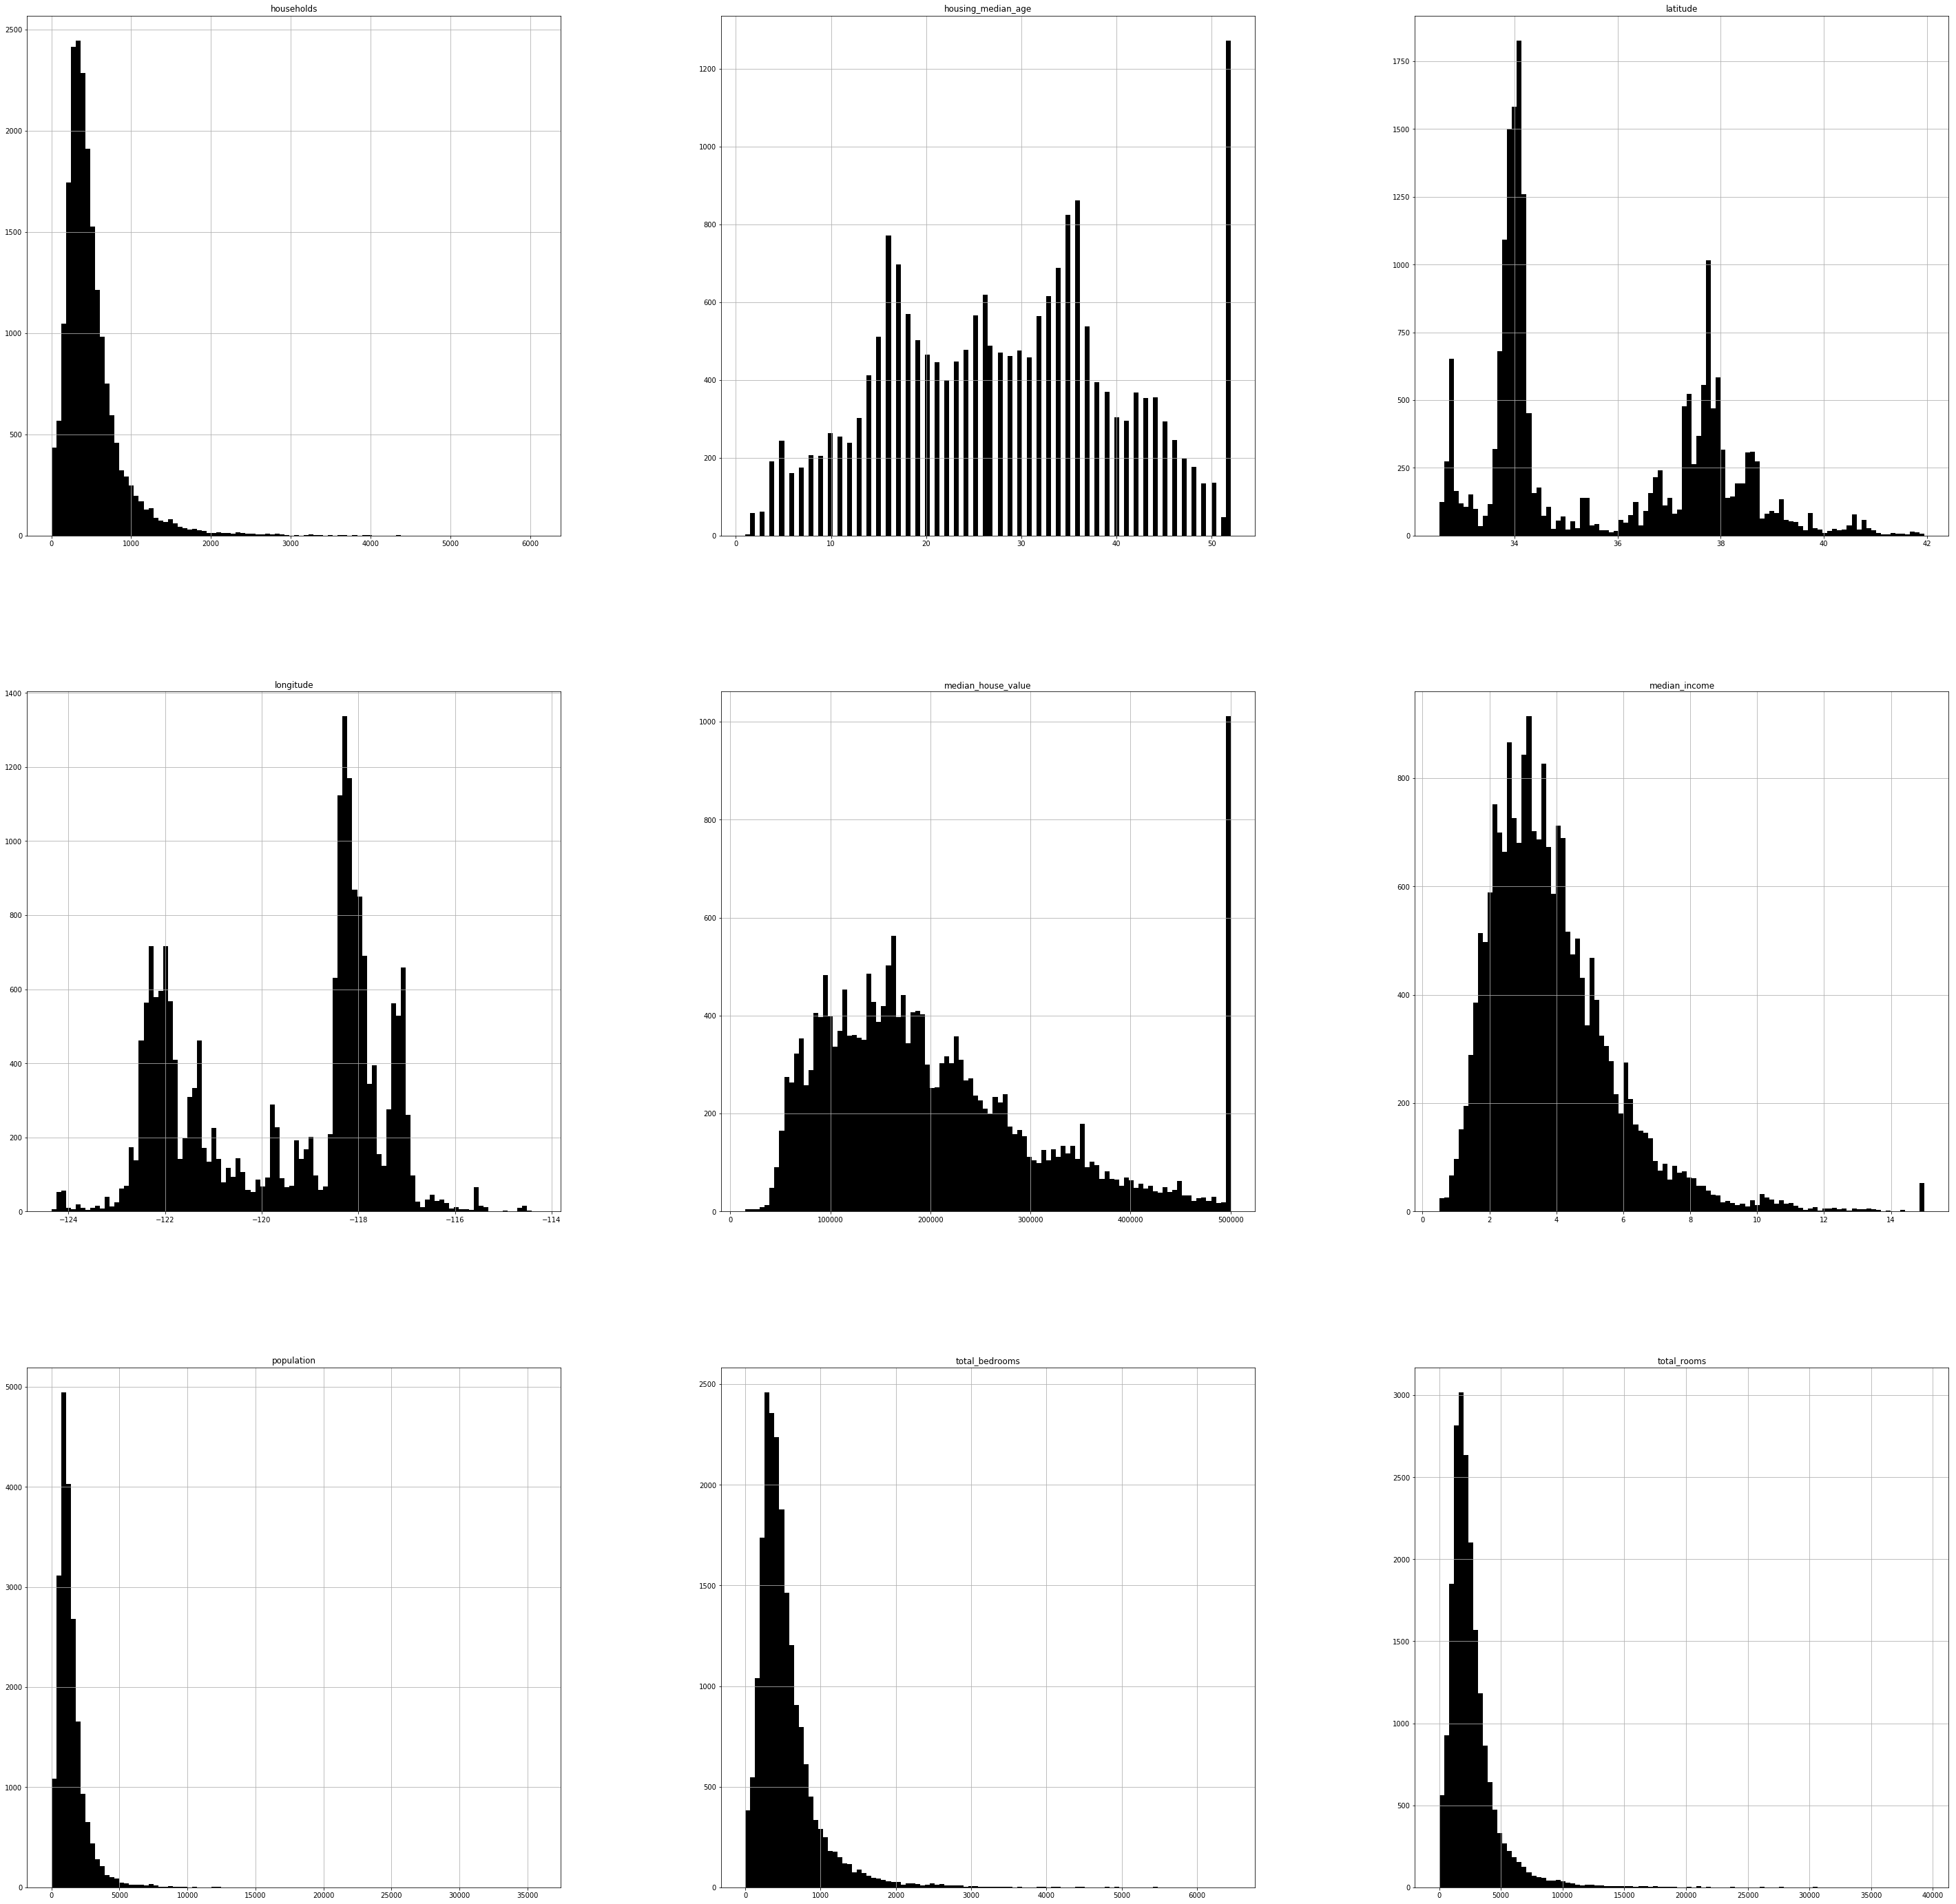

In [262]:
%matplotlib inline 
housing.hist(bins=100, figsize=(50,50),color = "black")
plt.show()

- hist()参数：bins-每张图柱子的个数，figsize-每张图尺寸的大小

# 创建测试集

In [263]:
np.random.seed(1)
trainset, testset = train_test_split(housing,test_size=0.3)
print("trainset",len(trainset),"testset",len(testset))
train_set = trainset.copy()
test_set = testset.copy()
print(id(trainset),id(testset),id(train_set),id(test_set))

trainset 14448 testset 6192
2116203581736 2116210430584 2116146948528 2116203946448


#### 连续数据离散化与分层采样

- 因为收入中位数对房价的影响较大，所以可以对房价离散化，然后进行分层采样，且数据集中的每个分层都要有足够的实例位于你的数据中。

In [264]:
# housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)#向上取整
# print(housing["income_cat"].value_counts())
# housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)#将大于5的类合并
# print(housing["income_cat"].value_counts())

# housing["median_income"].hist(bins=300, figsize=(5,5),color = "black")
# plt.show()
# housing["income_cat"].hist(bins=40, figsize=(5,5),color = "black")
# plt.show()

# from sklearn.model_selection import StratifiedShuffleSplit #sklearn中的StratifiedShuffleSplit类进行分层采样
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
# for train_index, test_index in split.split(housing, housing["income_cat"]): 
#     train_set = housing.loc[train_index] 
#     test_set = housing.loc[test_index]
# housing["income_cat"].value_counts() / len(housing)

- where函数用法 - 墨流觞的博客 - CSDN博客  https://blog.csdn.net/dss_dssssd/article/details/82818587

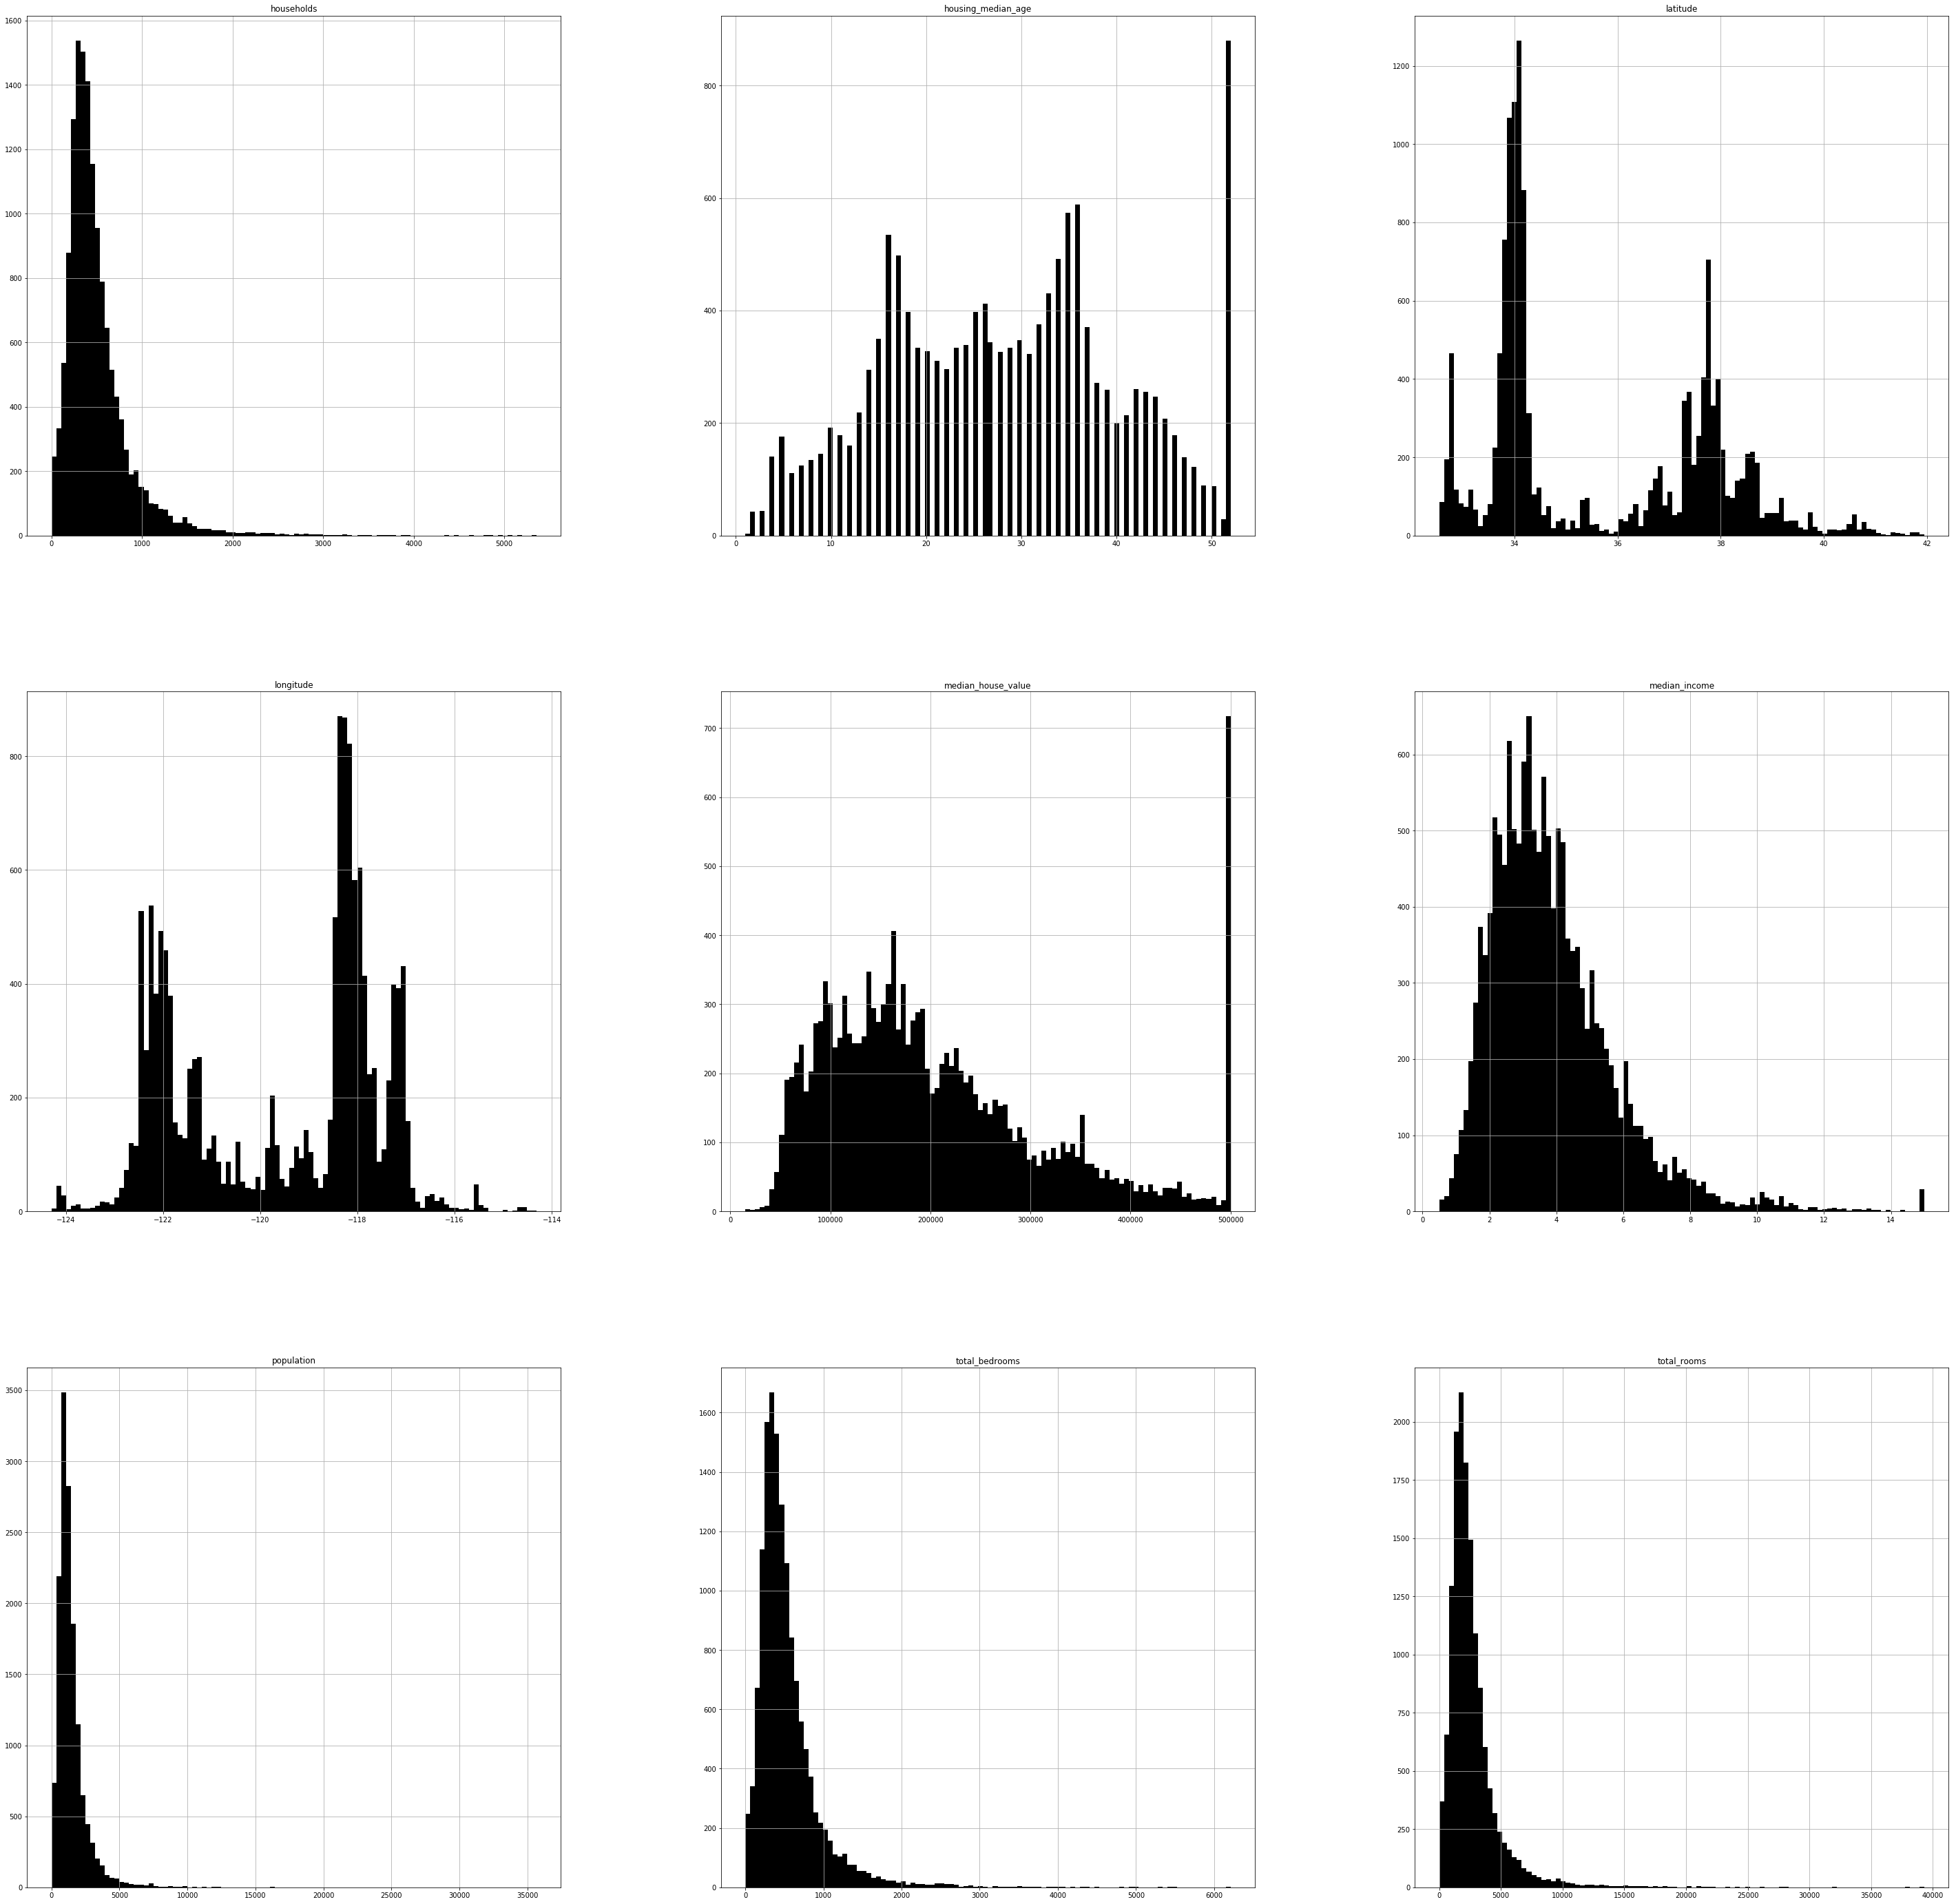

In [265]:
%matplotlib inline 
train_set.hist(bins=100, figsize=(50,50),color = "black")
plt.show()

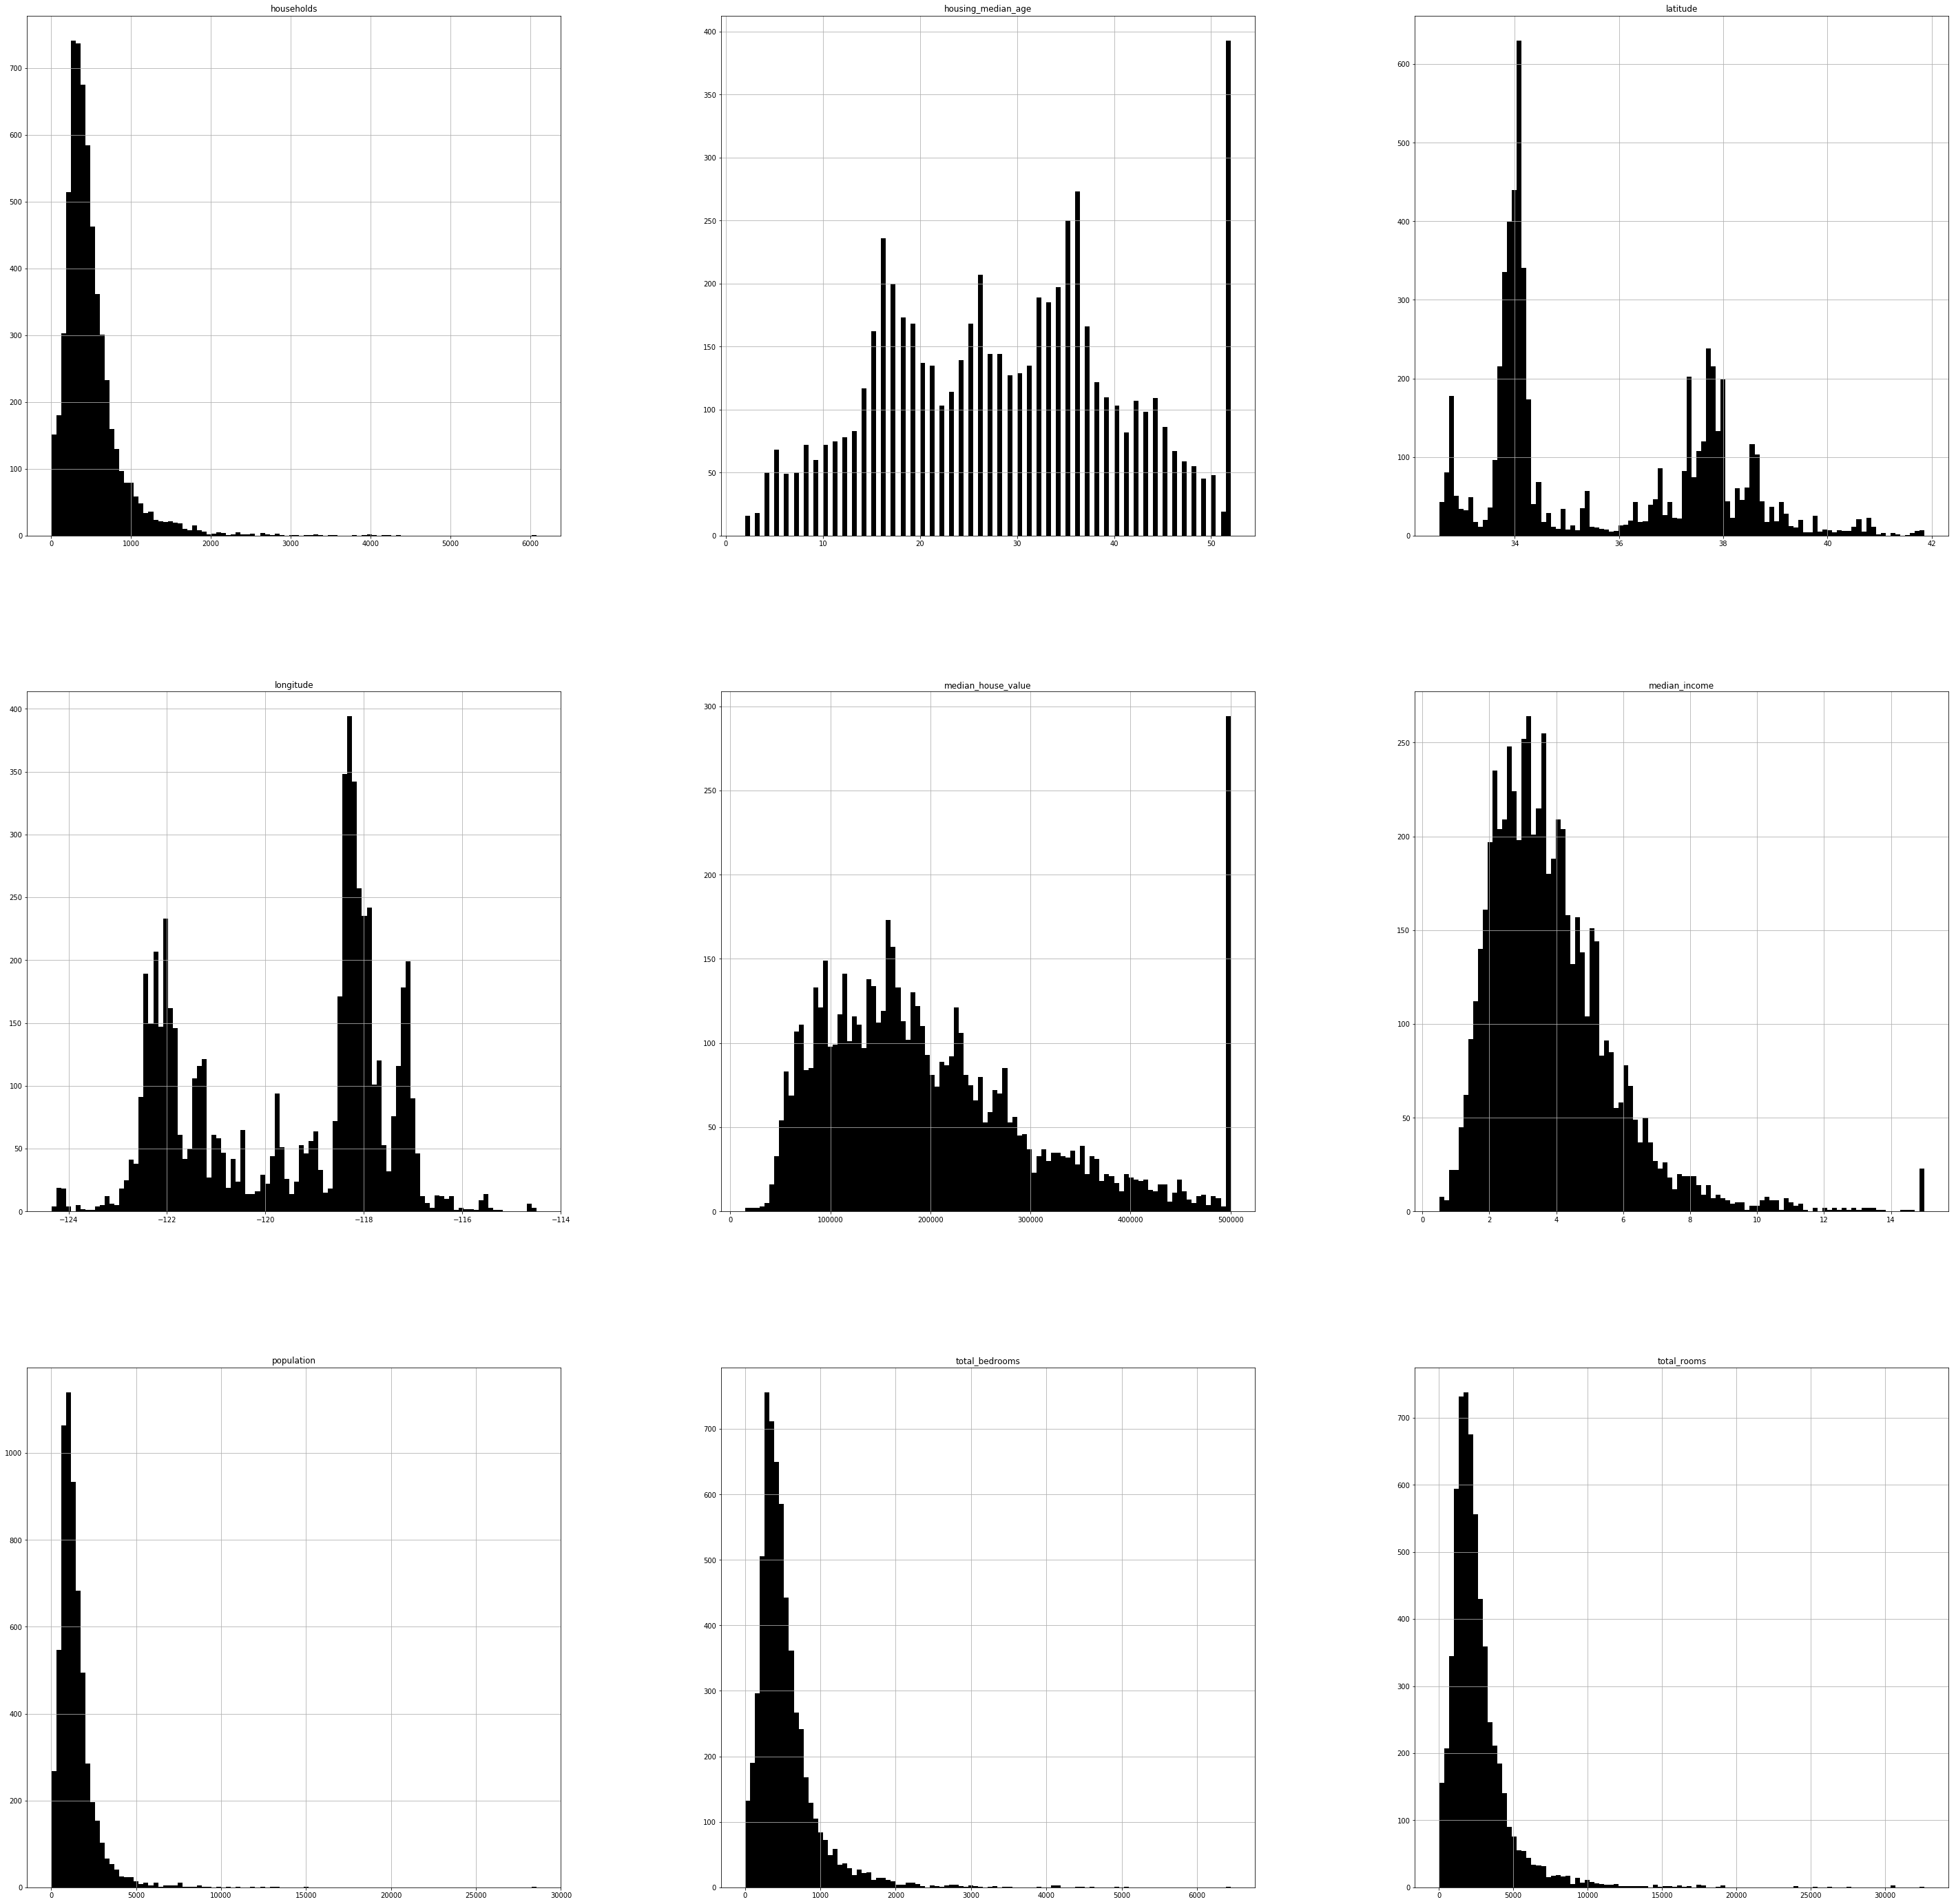

In [266]:
%matplotlib inline 
test_set.hist(bins=100, figsize=(50,50),color = "black")
plt.show()

In [267]:
#为什么缺失值都在测试集里面？可能与随机数种子有关
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 5748 to 235
Data columns (total 10 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14305 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
median_house_value    14448 non-null float64
ocean_proximity       14448 non-null object
dtypes: float64(9), object(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6192 entries, 4712 to 4287
Data columns (total 10 columns):
longitude             6192 non-null float64
latitude              6192 non-null float64
housing_median_age    6192 non-null float64
total_rooms           6192 non-null float64
total_bedrooms        6128 non-null float64
population            6192 non-null float64
households     

- 为了保证每一次运行时训练集与测试集保持不动，所以要设置随机种子
- 为保证数据集创建之后不被破坏，所以要对数据集进行备份。

# 数据清洗

#### 特征值理解与分析

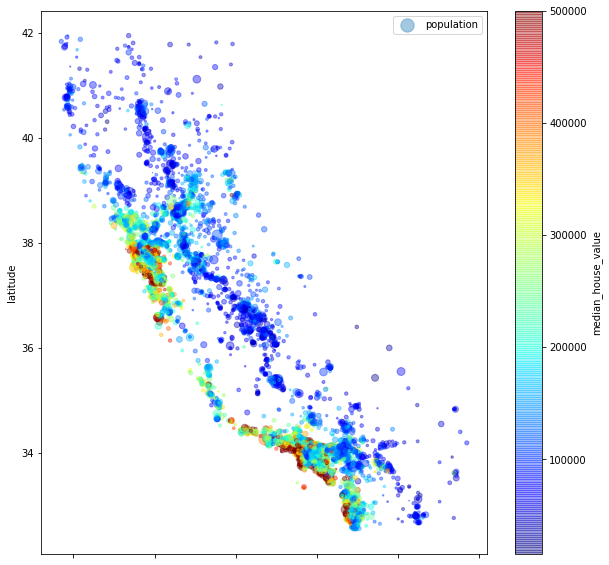

In [268]:
# 地理位置
train_set.plot(kind="scatter",
             x="longitude", 
             y="latitude", 
             alpha=0.4, 
             s=housing["population"]/100, 
             label="population", 
             c="median_house_value", 
             cmap=plt.get_cmap("jet"),
             figsize=(10,10),
             colorbar=True, )
#其他特征理解

#### 缺失值处理

In [269]:
# 对于有缺失值的数据，sklearn提供了一个类进行数据缺失值的处理,但一般要剔除计数属性。
Imputer()

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

- axis：指定轴数，默认axis=0代表列，axis=1代表行
- copy：设置为True代表不在原数据集上修改，设置为False时，就地修改.
- missing_values：缺失值，可以为整数或NaN(缺失值numpy.nan用字符串‘NaN’表示)，默认为NaN
- strategy：替换策略，字符串，默认用均值‘mean’替换
    - ①若为mean时，用特征列的均值替换
    - ②若为median时，用特征列的中位数替换
    - ③若为most_frequent时，用特征列的众数替换
- statistics_属性：axis设置为0时，每个特征的填充值数组，axis=1时，报没有该属性错误

In [270]:
# 训练imputer类得到填充的数据值
train_set_drop = train_set.drop("ocean_proximity", axis=1)
imputer = Imputer(strategy="most_frequent")
train_set_drop_imputer = imputer.fit_transform(train_set_drop)
print(imputer.statistics_)
train_set_imputer = pd.DataFrame(train_set_drop_imputer,columns = trainset.columns[:-1])
train_set_imputer.info()

[-1.18310e+02  3.40600e+01  5.20000e+01  1.58200e+03  3.45000e+02
  8.25000e+02  3.86000e+02  3.12500e+00  5.00001e+05]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 9 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
housing_median_age    14448 non-null float64
total_rooms           14448 non-null float64
total_bedrooms        14448 non-null float64
population            14448 non-null float64
households            14448 non-null float64
median_income         14448 non-null float64
median_house_value    14448 non-null float64
dtypes: float64(9)
memory usage: 1016.0 KB


# 统计分析

#### 相关性

In [271]:
corr = train_set_imputer.corr()
x = np.abs(corr)
x[x>0.2]
# 多重共线性

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,0.925161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.925161,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.000000,0.360329,0.315632,0.294987,0.299410,NaN,NaN
total_rooms,NaN,NaN,0.360329,1.000000,0.924947,0.852167,0.917842,0.201494,NaN
total_bedrooms,NaN,NaN,0.315632,0.924947,1.000000,0.868454,0.974680,NaN,NaN
population,NaN,NaN,0.294987,0.852167,0.868454,1.000000,0.902693,NaN,NaN
households,NaN,NaN,0.299410,0.917842,0.974680,0.902693,1.000000,NaN,NaN
median_income,NaN,NaN,NaN,0.201494,NaN,NaN,NaN,1.000000,0.689691
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689691,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

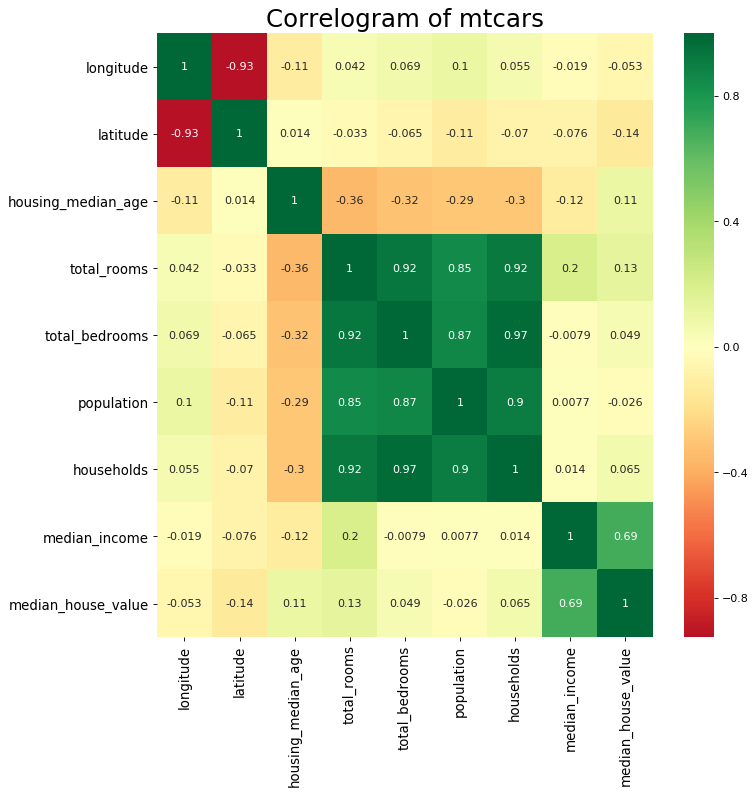

In [272]:
# Plot
plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### 正态性

Python正态性检验 - QimaoRyan的博客 - CSDN博客  https://blog.csdn.net/QimaoRyan/article/details/72861387

In [273]:
x = train_set_imputer.columns.tolist()
for i in range(len(x)) :
    print(train_set_imputer.columns[i],stats.normaltest(train_set_imputer[train_set_imputer.columns[i]].values).pvalue<0.1)
# log变换后
# 注意log变换要求自变量取值大于0
for i in range(len(x)) :
    print(train_set_imputer.columns[i],stats.normaltest(np.log(abs(train_set_imputer[train_set_imputer.columns[i]].values))).pvalue<0.1)    

longitude True
latitude True
housing_median_age True
total_rooms True
total_bedrooms True
population True
households True
median_income True
median_house_value True
longitude True
latitude True
housing_median_age True
total_rooms True
total_bedrooms True
population True
households True
median_income True
median_house_value True


# 数据变换

#### 归一化

In [274]:
#Scikit-Learn 提供了一个转换器 MinMaxScaler 来实现这个功能。它有一个超参 数 feature_range ，可以让你改变范围，如果不希望范围是 0 到 1。
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
train_set_m = MM.fit_transform(train_set_imputer)
train_set_m = pd.DataFrame(train_set_m,columns = housing.columns[:-1])
train_set_m.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.473392,0.328316,0.540516,0.067151,0.086414,0.039964,0.093337,0.232575,0.397223
std,0.200885,0.226943,0.246645,0.055232,0.067516,0.031690,0.071288,0.130206,0.238557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249249,0.147715,0.333333,0.037006,0.047673,0.022002,0.052081,0.142639,0.216908
50%,0.581582,0.181722,0.549020,0.054097,0.069415,0.032540,0.076349,0.209501,0.340413
75%,0.629630,0.549416,0.705882,0.080199,0.103881,0.048208,0.113123,0.292434,0.517320
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 标准化

In [275]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
train_set_s = SS.fit_transform(train_set_imputer)
train_set_s = pd.DataFrame(train_set_s,columns = housing.columns[:-1])
train_set_s.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04
mean,5.423894e-15,2.436881e-15,5.863096e-17,-1.070649e-16,-1.242930e-17,-1.845377e-17,-3.054496e-17,-1.584650e-16,-5.673295e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-2.356615e+00,-1.446736e+00,-2.191545e+00,-1.215846e+00,-1.279946e+00,-1.261163e+00,-1.309336e+00,-1.786276e+00,-1.665169e+00
25%,-1.115815e+00,-7.958231e-01,-8.400304e-01,-5.458135e-01,-5.738292e-01,-5.668499e-01,-5.787370e-01,-6.907455e-01,-7.558844e-01
50%,5.385841e-01,-6.459726e-01,3.447898e-02,-2.363550e-01,-2.517827e-01,-2.342871e-01,-2.383145e-01,-1.772240e-01,-2.381503e-01
75%,7.777744e-01,9.742851e-01,6.704858e-01,2.362369e-01,2.587207e-01,2.601348e-01,2.775567e-01,4.597386e-01,5.034454e-01
max,2.621533e+00,2.959803e+00,1.862999e+00,1.689024e+01,1.353181e+01,3.029604e+01,1.271869e+01,5.894141e+00,2.526852e+00


#### 类别属性

In [276]:
# Scikit-Learn 为这个任务提供了一个转换器 LabelEncoder和OneHotEncoder，以及LabelBinarizer（LabelEncoder+OneHotEncoder）
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer 

- OneHotEncoder独热编码和 LabelEncoder标签编码 - 三年一梦 - 博客园  https://www.cnblogs.com/king-lps/p/7846414.html
- OneHotEncoder独热编码要求一维数组
- LabelEncoder标签编码要求一个Series

In [277]:
# 标签编码
encoder1 = LabelEncoder() 
data11 = trainset["ocean_proximity"] 
data1 = encoder1.fit_transform(data11)#fit + transform
print(encoder1.classes_) 
data1

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([0, 0, 1, ..., 0, 1, 3], dtype=int64)

In [278]:
#独热编码
encoder2 = OneHotEncoder() 
#独热编码要求是一个 1D 数组，所以要用reshape转为列数组,而且要求数据是数值型
data2 = encoder2.fit_transform(data1.reshape(-1,1))
data2.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [279]:
# LabelBinarizer ，我们可以用一步执行上面两个转换（从文本分类到整数分类，再从整 数分类到独热向量）
encoder = LabelBinarizer()
data0 = encoder.fit_transform(data11)
data0

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# 最终数据

In [280]:
# 归一化 - 丢弃最后一列
# 标准化- 丢弃最后一列
# 归一化 - 标签
# 归一化 - 独热
    # x = pd.DataFrame(data0,columns = ["0","1","2","3","4"])
    # for i in ["0","1","2","3","4"]:
    #     train_set_m[i] = x[i]
    # d3 = train_set_m.drop(["ocean_proximity"],axis = 1)
# 标准化- 标签
# 标准化 - 独热
# 原始数据

In [281]:
#train_set_m  train_set_s  data1  data0

In [290]:
housing_labels = trainset["median_house_value"].copy()

In [291]:
# 训练集为data
# 标签为housing_labels

In [ ]:
data

In [ ]:
housing_labels

# 模型训练

#### 线性模型

In [ ]:
#模型训练
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(data,housing_labels)
#简单测试
print(LR.predict(data[:5])) 
housing_labels.iloc[:5] 

#### 决策树

In [195]:
#模型训练
from sklearn.tree import DecisionTreeRegressor
DC = DecisionTreeRegressor()
DC.fit(data,housing_labels)
#简单测试
print(DC.predict(data[:5])) 
housing_labels.iloc[:5] 

[238700. 171100.  55400.  69600. 213100.]


5748     238700.0
5592     171100.0
2110      55400.0
13901     69600.0
18425    213100.0
Name: median_house_value, dtype: float64

#### 随机森林

In [196]:
#训练模型
from sklearn.ensemble import RandomForestRegressor 
RF = RandomForestRegressor() 
RF.fit(data, housing_labels)
#简单测试
print(RF.predict(data[:5])) 
housing_labels.iloc[:5]

[224520. 169530.  58570.  75780. 231510.]


5748     238700.0
5592     171100.0
2110      55400.0
13901     69600.0
18425    213100.0
Name: median_house_value, dtype: float64

# 模型评价

#### 模型评价 - 均方误差

In [197]:
from sklearn.metrics import mean_squared_error
def pj (x):
    LRp = LR.predict(x)
    DCp = DC.predict(x)
    RFp = DC.predict(x)
    LR_rmse = np.sqrt(mean_squared_error(housing_labels,LRp))
    DC_rmse = np.sqrt(mean_squared_error(housing_labels,DCp))
    RF_rmse = np.sqrt(mean_squared_error(housing_labels,RFp))
    print(LR_rmse,"      ",DC_rmse,"      ",RF_rmse)
pj(data)

68591.96804265107        0.0        0.0


#### 模型评价 - 决定系数

In [198]:
from sklearn.metrics import r2_score
def r2 (x):
    LRp = LR.predict(x)
    DCp = DC.predict(x)
    RFp = DC.predict(x)
    LR_rmse = r2_score(housing_labels,LRp)
    DC_rmse = r2_score(housing_labels,DCp)
    RF_rmse = r2_score(housing_labels,RFp)
    print(LR_rmse,"      ",DC_rmse,"      ",RF_rmse)
r2(data)

0.6485153610848446        1.0        1.0


In [199]:
#从实际角度出发，决策树和随机森林肯定出现过拟合现象，所以此处直接使用均方误差是不适合的，应该采用新的方法，如采用交叉验证等。

#### 交叉验证
- 使用cross_val_score()函数实现

In [200]:
cross_val_score?
#cross_val_score中scoring参数可以取以下这些，表示模型评价指标
#['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error','normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted','r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

#### 交叉验证 - 均方误差

68763.45529332577      1721.5592131219953
69459.05544566331      1614.250551790103
51766.24064496749    1218.1379564100546


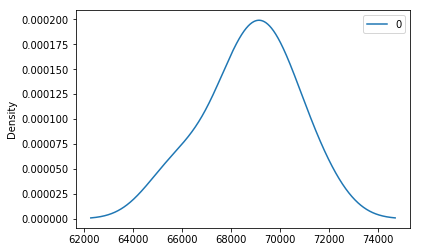

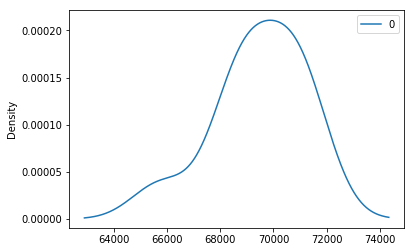

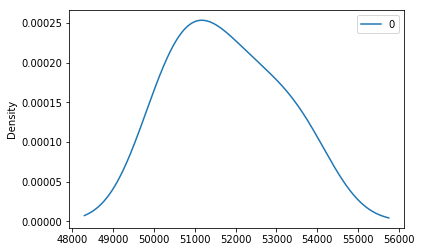

In [201]:
def cross_val (housing_MinMax):
    #LR
    from sklearn.model_selection import cross_val_score 
    scoresLR = cross_val_score(LR,housing_MinMax, housing_labels,scoring="neg_mean_squared_error",cv=10)
    rmse_scores_LR = np.sqrt(-scoresLR)
    print(rmse_scores_LR.mean(),"    ",rmse_scores_LR.std())
    rmse_scores_LR
    #DC
    from sklearn.model_selection import cross_val_score
    scoresDC = cross_val_score(DC,housing_MinMax,housing_labels,scoring = "neg_mean_squared_error",cv = 10)
    rmse_scores_DC = np.sqrt(-scoresDC)
    print(rmse_scores_DC.mean(),"    ",rmse_scores_DC.std())
    #RF
    from sklearn.model_selection import cross_val_score
    scoresRF = cross_val_score(RF,housing_MinMax, housing_labels,scoring="neg_mean_squared_error",cv=10)
    rmse_scores_RF = np.sqrt(-scoresRF)
    print(rmse_scores_RF.mean(),"  ",rmse_scores_RF.std())
    rmse_scores_RF
    pd.DataFrame(rmse_scores_LR).plot(kind = "kde")
    pd.DataFrame(rmse_scores_DC).plot(kind = "kde")
    pd.DataFrame(rmse_scores_RF).plot(kind = "kde")
cross_val(data)

#### 交叉验证 - 决定系数

0.6465146762937937      0.012293827219387947
0.6423166757409491      0.015713837330223204
0.797545371262378      0.01262089670190307


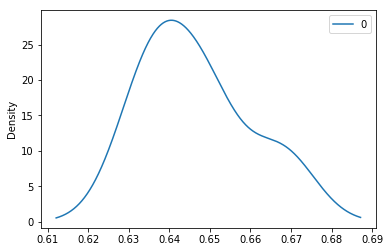

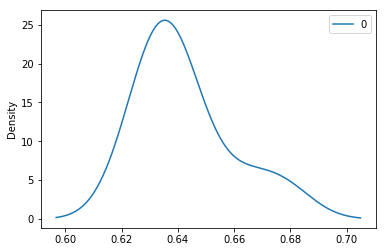

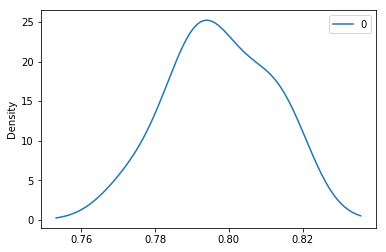

In [202]:
def cross_val_r (housing_MinMax):
    #LR
    from sklearn.model_selection import cross_val_score 
    scoresLR = cross_val_score(LR,housing_MinMax, housing_labels,scoring="r2",cv=10)
    print(scoresLR.mean(),"    ",scoresLR.std())
    #DC
    from sklearn.model_selection import cross_val_score
    scoresDC = cross_val_score(DC,housing_MinMax,housing_labels,scoring = "r2",cv = 10)
    print(scoresDC.mean(),"    ",scoresDC.std())
    #RF
    from sklearn.model_selection import cross_val_score
    scoresRF = cross_val_score(RF,housing_MinMax, housing_labels,scoring="r2",cv=10)
    print( scoresRF.mean(),"    ", scoresRF.std())
    pd.DataFrame(scoresLR).plot(kind = "kde")
    pd.DataFrame(scoresDC).plot(kind = "kde")
    pd.DataFrame(scoresRF).plot(kind = "kde")
cross_val_r(data)

## 模型微调

#### 网格搜索

In [203]:
from sklearn.model_selection import GridSearchCV 
PG = [{'n_estimators': [10, 20, 30, 40], 'max_features': [ 3, 5, 6, 7, 8]}] 
model_R = RandomForestRegressor() 
grid_search = GridSearchCV(model_R, 
                           PG, 
                           cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(data, housing_labels)
grid_search.best_params_

{'max_features': 5, 'n_estimators': 40}

In [204]:
#直接得到最佳的估计器
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [205]:
#特征重要性排序
c = grid_search.best_estimator_.feature_importances_
d = data.columns
s = pd.Series(d,index= c)
s.sort_index()

0.000370                     2
0.003786                     3
0.007369                     4
0.016101                     0
0.030550            households
0.033307        total_bedrooms
0.039530           total_rooms
0.047888            population
0.048851    housing_median_age
0.101257              latitude
0.120393             longitude
0.146947                     1
0.403650         median_income
dtype: object

# 训练集处理

In [46]:
# 缺失值
test_drop = test_set.drop(["ocean_proximity"],axis = 1)
test_op = test_set["ocean_proximity"]
test_set_imputer = imputer.transform(test_drop)
test = pd.DataFrame(test_set_imputer,columns = test_set.columns[:-1])

In [47]:
# 归一化
test_m = MM.transform(test)
# 标准化
test_s = SS.transform(test)

In [55]:
# 标签编码
data_1 = encoder1.transform(test_op)

In [56]:
# 独热编码
data_0 = encoder.transform(test_op)
data_0 = pd.DataFrame(data_0)